This file contains the results of the calibration applied in CalibrationV3.ipynb

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
tsv_file_path_1 = './PXD001468.tsv'
tsv_file_path_2 = './PXD001468_Calibrated.tsv'
df1 = pd.read_csv(tsv_file_path_1, sep='\t')
df2 = pd.read_csv(tsv_file_path_2, sep='\t')

In [7]:
dimensions1 = df1.shape
print(dimensions1)
dimensions2 = df2.shape
print(dimensions2)

(40002, 36)
(39591, 36)


In [8]:
df1q = df1[df1["spectrum_q"] < 0.01]
dimensions1q = df1q.shape
print(dimensions1q)
df2q = df2[df2["spectrum_q"] < 0.01]
dimensions2q = df2q.shape
print(dimensions2q)

(20442, 36)
(21074, 36)


In [11]:
len(df1q)

20442

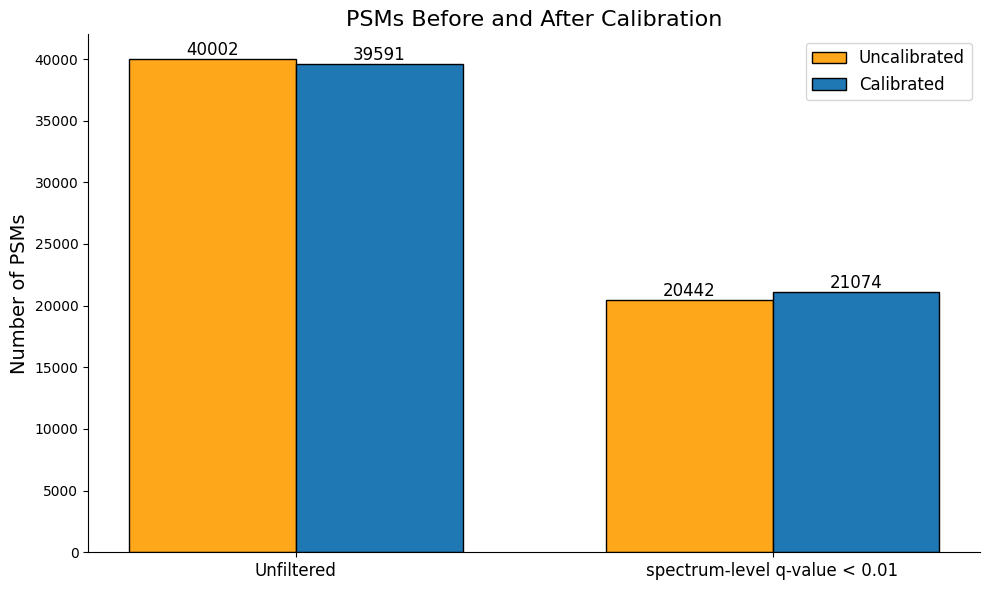

In [12]:
import matplotlib.pyplot as plt

# Data
psms_uncalibrated = [len(df1), len(df1q)]
psms_calibrated = [len(df2), len(df2q)]
labels = ['Unfiltered', 'spectrum-level q-value < 0.01']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(labels))

bar1 = ax.bar(index, psms_uncalibrated, bar_width, label='Uncalibrated', color='#FFA71B', edgecolor='black')
bar2 = ax.bar([i + bar_width for i in index], psms_calibrated, bar_width, label='Calibrated', edgecolor='black')

# Add labels, title, and legend
ax.set_ylabel('Number of PSMs', fontsize=14)
ax.set_title('PSMs Before and After Calibration', fontsize=16)
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(labels, fontsize=12)
ax.legend(fontsize=12)

# Add amounts above the bars
for i, bar in enumerate(bar1):
    plt.text(bar.get_x() + bar.get_width() / 2.0, bar.get_height(), str(psms_uncalibrated[i]), ha='center', va='bottom', fontsize=12)

for i, bar in enumerate(bar2):
    plt.text(bar.get_x() + bar.get_width() / 2.0, bar.get_height(), str(psms_calibrated[i]), ha='center', va='bottom', fontsize=12)

# Remove unnecessary spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show plot
plt.tight_layout()
plt.show()

In [13]:
merged_df = pd.merge(df1q, df2q, on=['peptide', 'scannr'], how='inner')
merged_df.head(5)

,peptide,proteins_x,num_proteins_x,filename_x,scannr,rank_x,label_x,expmass_x,calcmass_x,charge_x,peptide_len_x,missed_cleavages_x,isotope_error_x,precursor_ppm_x,fragment_ppm_x,hyperscore_x,delta_next_x,delta_best_x,rt_x,aligned_rt_x,predicted_rt_x,delta_rt_model_x,matched_peaks_x,longest_b_x,longest_y_x,longest_y_pct_x,matched_intensity_pct_x,scored_candidates_x,poisson_x,sage_discriminant_score_x,posterior_error_x,spectrum_q_x,peptide_q_x,protein_q_x,ms1_intensity_x,ms2_intensity_x,proteins_y,num_proteins_y,filename_y,rank_y,label_y,expmass_y,calcmass_y,charge_y,peptide_len_y,missed_cleavages_y,isotope_error_y,precursor_ppm_y,fragment_ppm_y,hyperscore_y,delta_next_y,delta_best_y,rt_y,aligned_rt_y,predicted_rt_y,delta_rt_model_y,matched_peaks_y,longest_b_y,longest_y_y,longest_y_pct_y,matched_intensity_pct_y,scored_candidates_y,poisson_y,sage_discriminant_score_y,posterior_error_y,spectrum_q_y,peptide_q_y,protein_q_y,ms1_intensity_y,ms2_intensity_y
0,NM[+15.9949]GGPYGGGNYGPGGSGGSGGYGGR,tr|A0A384NL58|A0A384NL58_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=19675,1,1,2204.8997,2204.8930,2,25,0,0.0,2.989617,2.100378,90.574402,62.170476,0.0,68.795135,0.329163,0.320285,0.008878,30,12,17,0.680000,54.085710,7,-14.058395,3.668188,-324.0,0.000723,0.001377,0.002173,254438610.0,19130256.0,tr|A0A384NL58|A0A384NL58_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212_Calibrated...,1,1,2204.8997,2204.8930,2,25,0,0.0,2.989617,1.295742,90.574402,62.170476,0.0,68.795135,0.329163,0.318065,0.011098,30,12,17,0.680000,54.085710,6,-12.716895,3.567295,-324.0,0.000708,0.001366,0.002139,254438610.0,19130256.0
1,NM[+15.9949]GGPYGGGNYGPGGSGGSGGYGGR,tr|A0A384NL58|A0A384NL58_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=19398,1,1,2204.8987,2204.8930,2,25,0,0.0,2.546712,2.024363,87.335601,59.066865,0.0,68.121860,0.325942,0.320285,0.005657,28,6,17,0.680000,51.468340,6,-12.166700,3.552844,-324.0,0.000723,0.001377,0.002173,685737100.0,48448784.0,tr|A0A384NL58|A0A384NL58_HUMAN,1,b1948_293T_proteinID_12B_QE3_122212_Calibrated...,1,1,2204.8987,2204.8930,2,25,0,0.0,2.546712,1.447960,89.835223,61.566487,0.0,68.121860,0.325942,0.318065,0.007877,29,7,17,0.680000,51.852330,5,-11.076755,3.536219,-324.0,0.000708,0.001366,0.002139,685737100.0,48810244.0
2,SSGSPYGGGYGSGGGSGGYGSR,tr|A0A384NL63|A0A384NL63_HUMAN;tr|A0A7I2V2R3|A...,5,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=15193,1,1,1909.7876,1909.7827,3,22,0,0.0,2.556734,1.991155,82.026801,53.288273,0.0,58.068718,0.277841,0.316053,0.038212,28,11,16,0.727273,45.793740,10,-16.193417,3.550692,-324.0,0.000723,0.001377,0.002173,42127748.0,4489507.5,tr|A0A384NL63|A0A384NL63_HUMAN;tr|A0A7I2V2R3|A...,5,b1948_293T_proteinID_12B_QE3_122212_Calibrated...,1,1,1909.7876,1909.7827,3,22,0,0.0,2.556734,1.466948,82.026801,53.288273,0.0,58.068718,0.277841,0.311812,0.033972,28,11,16,0.727273,45.793740,9,-15.684476,3.443453,-324.0,0.000708,0.001366,0.002139,42127748.0,4489507.5
3,SSGSPYGGGYGSGGGSGGYGSR,tr|A0A384NL63|A0A384NL63_HUMAN;tr|A0A7I2V2R3|A...,5,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=15312,1,1,1909.7885,1909.7827,2,22,0,0.0,3.004162,2.199959,91.323302,57.209023,0.0,58.315502,0.279022,0.316053,0.037031,30,7,11,0.500000,67.043304,5,-12.422244,3.537904,-324.0,0.000723,0.001377,0.002173,363671870.0,27385364.0,tr|A0A384NL63|A0A384NL63_HUMAN;tr|A0A7I2V2R3|A...,5,b1948_293T_proteinID_12B_QE3_122212_Calibrated...,1,1,1909.7885,1909.7827,2,22,0,0.0,3.004162,1.237310,93.914468,59.800188,0.0,58.315502,0.279022,0.311812,0.032791,31,11,11,0.500000,67.462900,5,-12.788019,3.512641,-324.0,0.000708,0.001366,0.002139,363671870.0,27556756.0
4,IGDLQAFQGHGAGNLAGLK,tr|A0A7P0T8F1|A0A7P0T8F1_HUMAN;tr|A0A7P0T8U7|A...,7,b1948_293T_proteinID_12B_QE3_122212.mzML,controllerType=0 controllerNumber=1 scan=55692,1,1,1865.9807,1865.9751,2,19,0,0.0,3.009272,2.289789,77.181912,48.973836,0.0,150.484760,0.7200

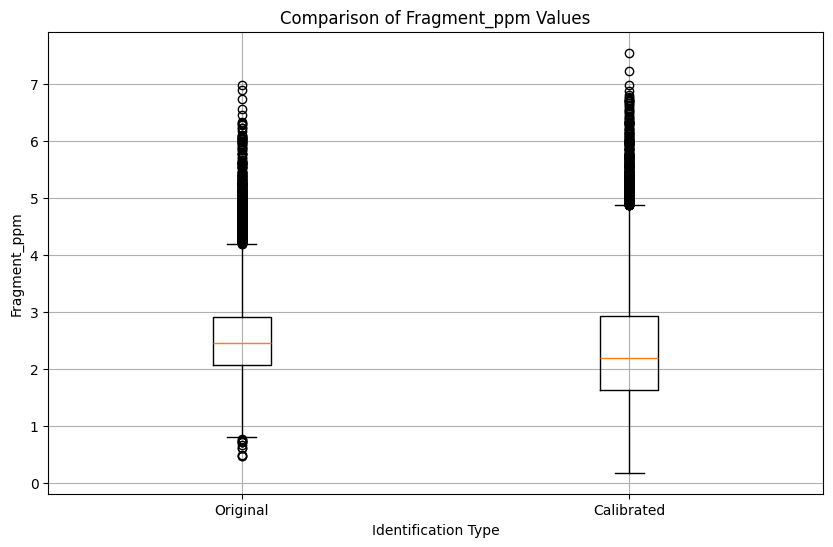

In [14]:
import matplotlib.pyplot as plt

# Extract fragment_ppm values for original (_x) and calibrated (_y) identifications
fragment_ppm_x = merged_df['fragment_ppm_x']
fragment_ppm_y = merged_df['fragment_ppm_y']

# Create a figure and axes for the plot
plt.figure(figsize=(10, 6))

# Create a boxplot to compare the distributions of fragment_ppm values
plt.boxplot([fragment_ppm_x, fragment_ppm_y], labels=['Original', 'Calibrated'])

# Set labels and title
plt.xlabel('Identification Type')
plt.ylabel('Fragment_ppm')
plt.title('Comparison of Fragment_ppm Values')

# Show plot
plt.grid(True)
plt.show()

In [15]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(fragment_ppm_x, fragment_ppm_y)

# Print the test statistic and p-value
print("Mann-Whitney U statistic:", statistic)
print("p-value:", p_value)

# Determine the significance level
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference between the distributions.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference between the distributions.")


Mann-Whitney U statistic: 239541752.5
p-value: 3.445650528515165e-226
Reject the null hypothesis: There is a statistically significant difference between the distributions.


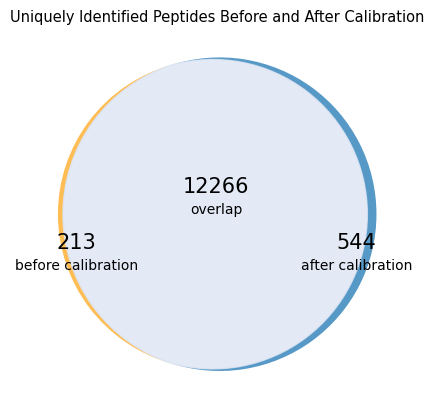

In [16]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Get the sets of unique peptides in each dataframe
peptides_df1q = set(df1q['peptide'].unique())
peptides_df2q = set(df2q['peptide'].unique())

# Create the Venn diagram with specified colors and without set labels
venn = venn2([peptides_df1q, peptides_df2q], set_colors=('#FFA71B', '#1F77B4'))

# Set overlap color (slightly darker)
overlap_color = '#DAE3F3'  # Reducing RGB values slightly
venn.get_patch_by_id('11').set_color(overlap_color)

# Set transparency of circles
for patch in venn.patches:
    patch.set_alpha(0.75)  # Set transparency of circles to 0.5

# Add label for the overlap
plt.text(0, 0.02, 'overlap', fontsize=10, color='black', ha='center', va='center')

plt.text(-0.5, -0.18, 'before calibration', fontsize=10, color='black', ha='center', va='center')

plt.text(0.5, -0.18, 'after calibration', fontsize=10, color='black', ha='center', va='center')

# Increase font size of the number in the middle
venn.get_label_by_id('11').set_fontsize(15)
venn.get_label_by_id('10').set_fontsize(15)
venn.get_label_by_id('01').set_fontsize(15)

# Adjust position of the number in the middle
venn.get_label_by_id('11').set_position((0, 0.1))  # Adjust the coordinates as needed
venn.get_label_by_id('10').set_position((-0.5, -0.1))
venn.get_label_by_id('01').set_position((0.5, -0.1))

# Hide the set labels (A and B)
venn.get_label_by_id('A').set_visible(False)
venn.get_label_by_id('B').set_visible(False)

# Add title
plt.title('Uniquely Identified Peptides Before and After Calibration', fontsize=10.5)

# Show plot
plt.show()